# OsloMet march 2021

## Get essentials

Import text and graph modules for analysis, and css for display

In [1]:
from dhlab.module_update import update, css, code_toggle, printmd

In [32]:
css()

In [76]:
%%HTML
<style>
p {font-size:1.5em;};
</style>

## Module

In [3]:
import dhlab.nbtext as nb   # import the whole module, but individual commands can be imported separately
import dhlab.graph_networkx_louvain as gnl 
import networkx as nx
from dhlab.graph_networkx_louvain import cutdown, make_collocation_graph
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [21]:

plt.rcParams["font.size"] = 18


In [22]:
def plotfig(a_plot, font_size = 18, legend = 18, loc = 1, title_size = 20):
    #fsize = plt.rcParams["font.size"
    ax = a_plot
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    plt.legend(loc = loc, prop={'size': 18})
    #plt.rcParams["font.size"] = fsize
    return

In [102]:
def show_cliques(G):
    C = gnl.make_cliques_from_graph(G.to_undirected())
    cliques = [(t, ', '.join(C[1][t])) for t in C[1]]
    cliques.sort(key=lambda x: x[0][1])
    for x, y in cliques:
        print(x, y)
        print()

# Aggregation data

### Trend lines, n-grams, word graphs




### Trend lines

Data up to trigrams.

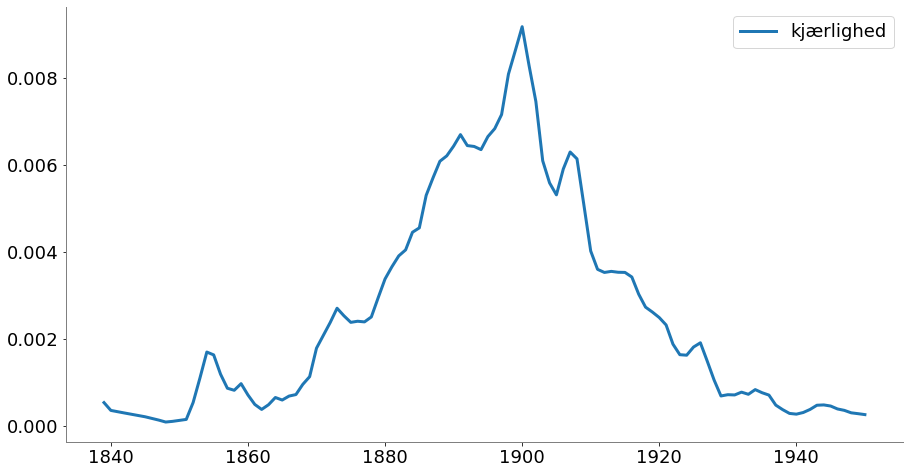

In [9]:
plotfig(nb.nb_ngram("kjærlighed", years=(1800, 1950), smooth=5).plot(figsize=(15,8), lw=3))

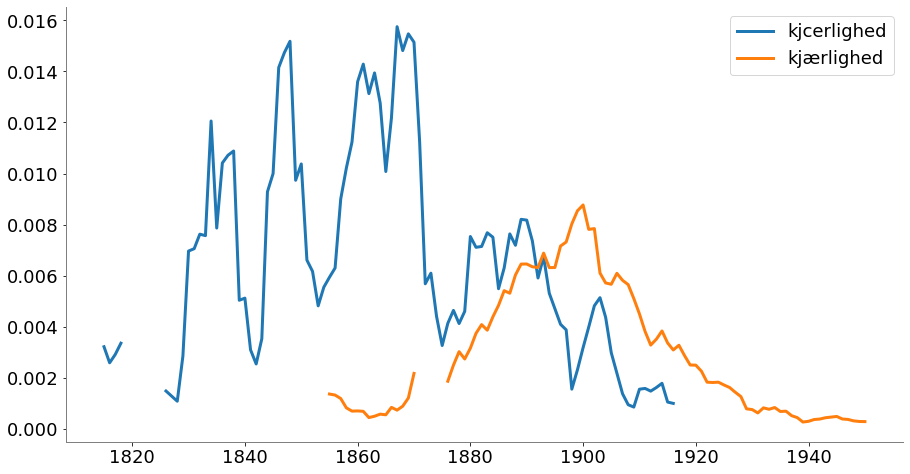

In [23]:
plotfig(nb.nb_ngram("kjcerlighed, kjærlighed", years=(1800, 1950), smooth=1).sort_index().rolling(window=5).mean().plot(figsize=(15,8), lw=3))

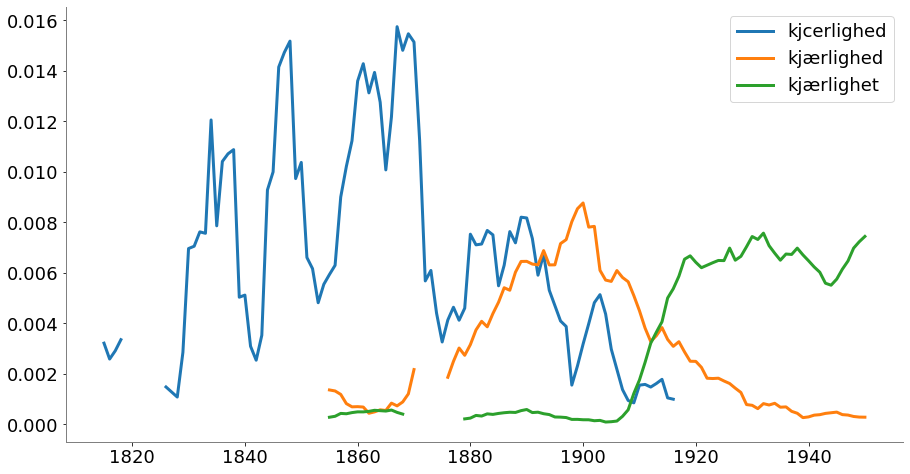

In [17]:
plotfig(nb.nb_ngram("kjcerlighed, kjærlighed, kjærlighet", years=(1800, 1950), smooth=1).sort_index().rolling(window=5).mean().plot(figsize=(15,8), lw=3))

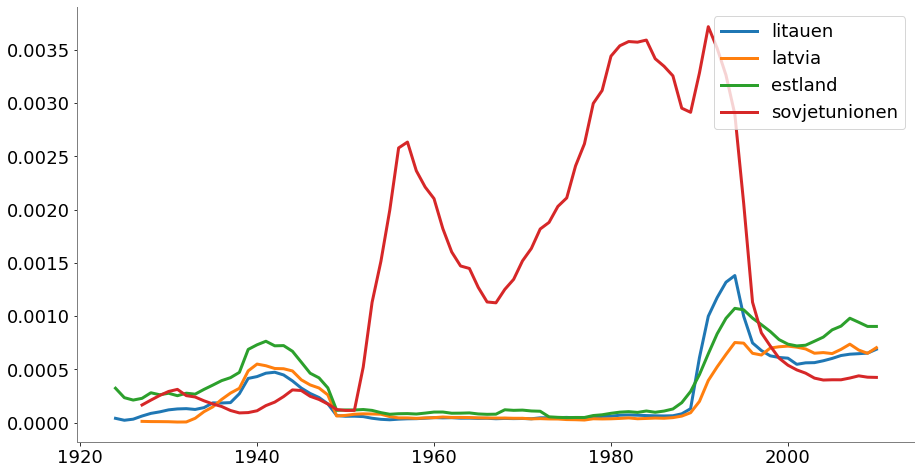

In [174]:
plotfig(nb.nb_ngram("litauen, latvia, estland, sovjetunionen", years=(1920, 2010), smooth=1, corpus = "avis").sort_index().rolling(window=5).mean().plot(figsize=(15,8), lw=3))

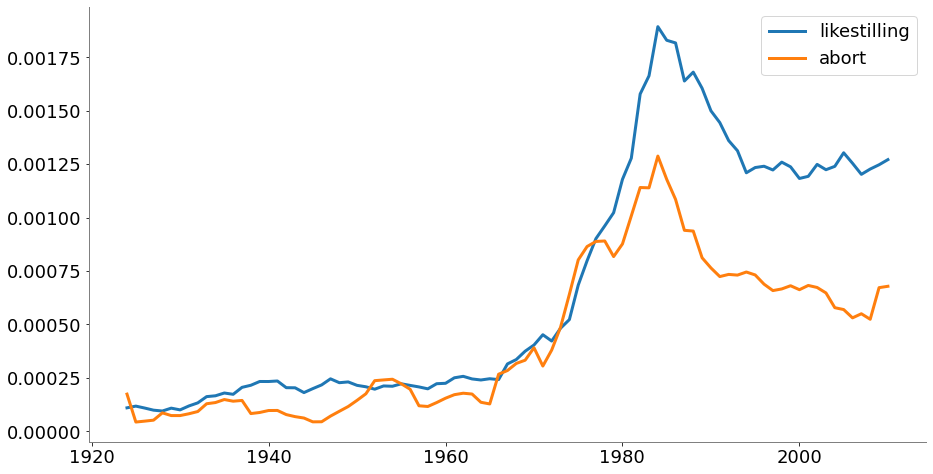

In [177]:
plotfig(nb.nb_ngram("likestilling, abort", years=(1920, 2010), smooth=1, corpus = "bok").sort_index().rolling(window=5).mean().plot(figsize=(15,8), lw=3))

# Using ngrams to measure associations between words

There is a relationship of frequency between nouns (pronouns and common nouns, and verbs and adjectives as well). A context may change that relationship. For instance, two adjectives like "blue" and "red" may switch depending on what they modify. 


## nb.difference()

The command `difference(A, B, C, D)` computes 

$$\textrm{difference}(A,B,C,D) = \frac{\frac{A}{B}}{\frac{C}{D}}$$

It compares the ratio of the first two arguments with the ratio of the second two. This is useful when one wants to compare two words in different contexts.

For a certain selection of arguments, this leads to a simple interpretations. If *difference* is less than 1, it means the numerator ratio is smaller than the denominator, which can be used to compare contexts, and  see how contexts make a difference. For example is *w* and *v* are two words, and *C* is a context, *difference* can be used to see if the context is associated with *w* or *v*:

If $\textrm{difference}(C(w),C(v),w,v) > 1$ then $C$ is associated with $w$, otherwise with $v$. In this case, we can say that the context $C$ prefers $w$ for $v$. 

### Comments during lecture

his house = huset hans or hans hus

och så ble huset hans  = and then the house became his

her legs = leggene hennes or hennes legger

Sønnen hennes legger kabal

§ sønnen

sønnen hennes

hennes legger

legger kabal

kabal §

## The case for _red_ and _blue_

In [58]:
nb.difference('blå bil', 'rød bil', 'blå', 'rød')

0.44832801345232315

In [59]:
nb.difference('blå sofa', 'rød sofa', 'blå', 'rød')

1.5518077670177213

## Gender differences

In [47]:
# measure difference between men and women using pronouns

nb.difference('han gråter', 'hun gråter', 'han', 'hun')

0.24425557325619277

In [48]:
# gendered body parts

nb.difference('håret hans', 'håret hennes', 'hans', 'hennes')

0.18910122506774152

In [179]:
# gendered body parts

nb.difference('neven hans', 'neven hennes', 'hans', 'hennes', corpus = 'bok')

1.90045255572505

## How about different grammatical cases?

In [30]:
nb.difference('ham', 'henne', 'han', 'hun')

0.618438068090108

In [31]:
nb.difference('hans', 'hennes', 'han', 'hun')

1.2200543525365617

At this point it may be helpful to just add in the pronouns in a template and study different contexts

In [15]:
diff = lambda x: nb.difference("han " + x, "hun " + x, "han", "hun")
diffseries = lambda s: pd.Series(list(map(diff, s)), index = s)

The examples above can be formulated by specifying only the contexts

In [16]:
he_she = diffseries("gråter påstår føler hevder sover arbeider snorker kjører".split())

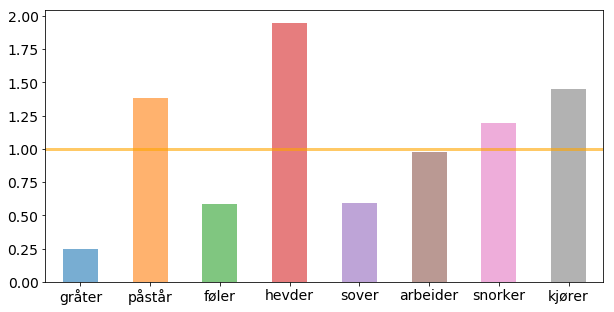

In [17]:
he_she.plot(kind='bar', figsize = (10,5), alpha = 0.6, rot = 0, fontsize=14 )
plt.axhline(y=1, linewidth=3, color='orange', alpha=0.6)

In the case above, it is clear that $\textrm{'hun gråter'}$ (she sobs) has a lower frequency than expected, by looking at the ratio $\frac{\textrm{'han'}}{\textrm{'hun'}}$.

## Measuring associations

Still in a gendered perspective

In [13]:
nb.difference('rike menn', 'rike kvinner', 'menn', 'kvinner')

3.9150311882029563

In [67]:
# measure difference between men and women
nb.difference('fattige menn', 'fattige kvinner', 'menn', 'kvinner')

0.2821076768706094

# Word models

Words as graphs. Three languages, Norwegian, English and German.


demokrati og diktatur

diktatur og folkestyre

folkestyre og demokrati

aristokrati og demokrati

... og ...

X og Y  (X and Y) ==>  X->Y

Louvain-method

clique-clustering

#### Norwegian

In [98]:
nor = nb.make_graph('demokrati', cutoff = 16)

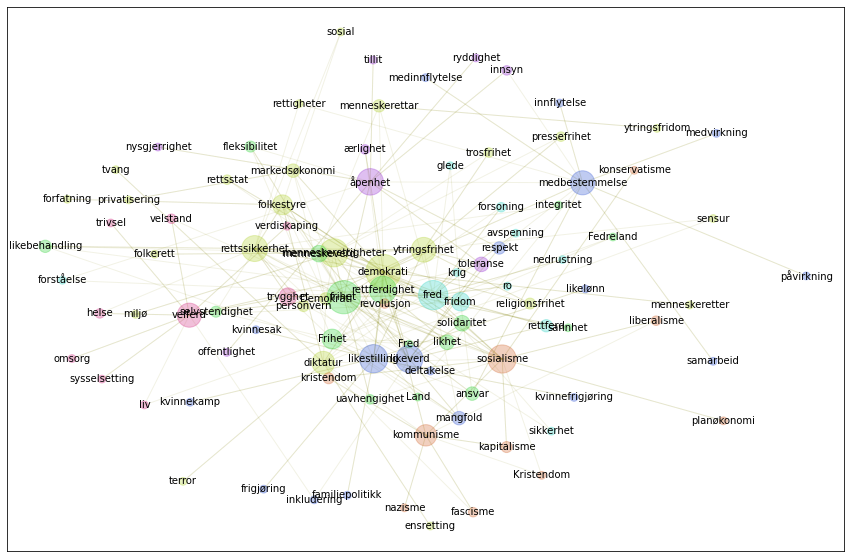

In [99]:
gnl.show_graph(nor, spread = 1.9)

## Clusters

In [100]:
gnl.show_communities(nor)

demokrati-menneskerettigheter :  demokrati, menneskerettigheter, rettssikkerhet, ytringsfrihet, diktatur, folkestyre, markedsøkonomi, Demokrati, menneskerettar, personvern, religionsfrihet, trosfrihet, rettsstat, pressefrihet, menneskeretter, forfatning, terror, tvang, sosial, ensretting, folkerett, privatisering, ytringsfridom, miljø, rettigheter, sensur

frihet-rettferdighet :  frihet, rettferdighet, Frihet, menneskeverd, solidaritet, likhet, ansvar, likebehandling, fleksibilitet, selvstendighet, uavhengighet, Fred, integritet, sannhet, Land, Fedreland

fred-fridom :  fred, fridom, rettferd, forsoning, avspenning, glede, nedrustning, forståelse, sikkerhet, ro, krig

likestilling-likeverd :  likestilling, likeverd, medbestemmelse, mangfold, respekt, innflytelse, kvinnesak, likelønn, kvinnefrigjøring, deltakelse, påvirkning, frigjøring, kvinnekamp, medvirkning, inkludering, medinnflytelse, familiepolitikk, samarbeid

åpenhet-toleranse :  åpenhet, toleranse, ærlighet, innsyn, tillit, of

# Cliques

Image taken from https://en.wikipedia.org/wiki/Clique_(graph_theory)
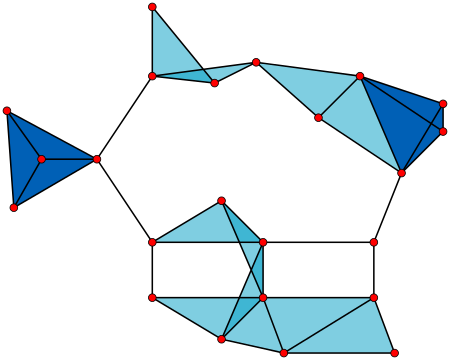
Image taken from https://en.wikipedia.org/wiki/Clique_(graph_theory)

In [103]:
show_cliques(nor)

(3, 1) menneskerettigheter, trosfrihet, toleranse, demokrati, liberalisme, velferd, likebehandling, selvstendighet, medbestemmelse, kapitalisme, rettferd, rettferdighet, menneskerettar, mangfold, menneskeverd, likestilling, kommunisme, rettsstat, innsyn, sosial, integritet, åpenhet, forsoning, Frihet, uavhengighet, fred, personvern, folkestyre, kristendom, pressefrihet, markedsøkonomi, ytringsfrihet, religionsfrihet, fascisme, likhet, likeverd, sosialisme, Kristendom, glede, fleksibilitet, respekt, frihet, Demokrati, sikkerhet, fridom, trygghet, diktatur, rettssikkerhet, revolusjon, solidaritet

(4, 1) diktatur, demokrati, sosialisme, kommunisme

(5, 1) menneskerettigheter, likeverd, fred, frihet, demokrati, rettferdighet, menneskeverd, likestilling

(4, 2) likhet, menneskerettigheter, likeverd, sosialisme, Frihet, fred, folkestyre, frihet, demokrati, rettferdighet, menneskeverd, trygghet, rettssikkerhet, likestilling, ytringsfrihet



#### English

In [104]:
eng = nb.make_graph('democracy', lang='eng')

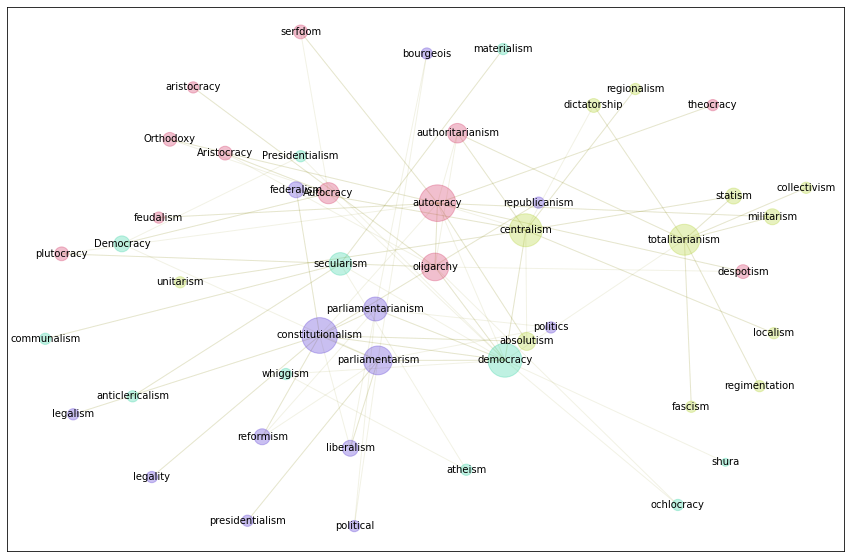

In [105]:
gnl.show_graph(eng, spread = 1.9)

In [106]:
gnl.show_communities(eng)

centralism-totalitarianism :  centralism, totalitarianism, absolutism, statism, militarism, dictatorship, collectivism, regionalism, unitarism, localism, fascism, regimentation

democracy-secularism :  democracy, secularism, atheism, communalism, materialism, ochlocracy, whiggism, anticlericalism, shura

constitutionalism-parliamentarism :  constitutionalism, parliamentarism, parliamentarianism, federalism, reformism, liberalism, political, presidentialism, politics, legality, republicanism, legalism, bourgeois

autocracy-oligarchy :  autocracy, oligarchy, Autocracy, authoritarianism, Democracy, despotism, serfdom, Aristocracy, plutocracy, Orthodoxy, feudalism, Presidentialism, aristocracy, theocracy



In [107]:
show_cliques(eng)

(3, 1) despotism, centralism, democracy, constitutionalism, absolutism, parliamentarism, reformism, liberalism, parliamentarianism, authoritarianism, ochlocracy, plutocracy, oligarchy, autocracy



#### German

In [116]:
ger = nb.make_graph('Demokratische', lang='ger')

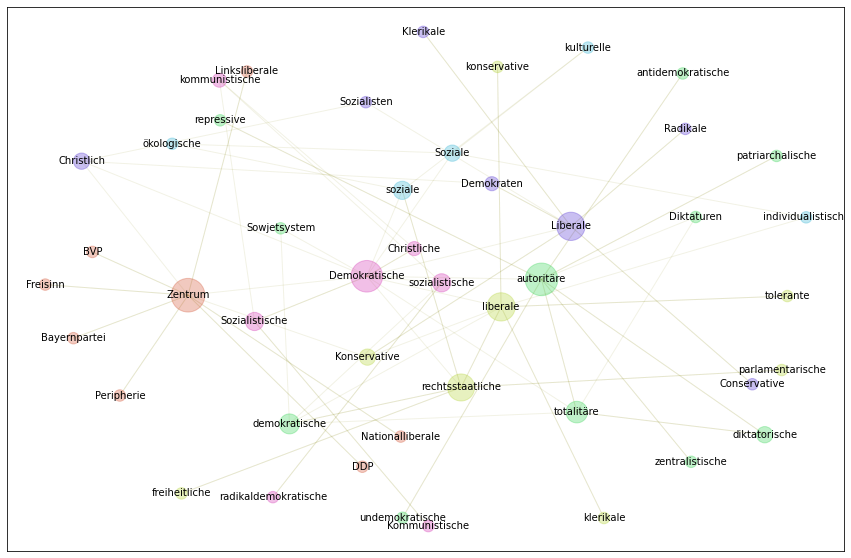

In [117]:
gnl.show_graph(ger, spread = 1.9)

In [118]:
gnl.show_communities(ger)

liberale-rechtsstaatliche :  liberale, rechtsstaatliche, demokratische, Konservative, tolerante, Sowjetsystem, freiheitliche, klerikale, parlamentarische, konservative

soziale-Soziale :  soziale, Soziale, individualistische, ökologische, kulturelle

autoritäre-totalitäre :  autoritäre, totalitäre, diktatorische, zentralistische, patriarchalische, Diktaturen, repressive, undemokratische, antidemokratische

Liberale-Christlich :  Liberale, Christlich, Demokraten, Radikale, Sozialisten, Klerikale, Conservative

Demokratische-Sozialistische :  Demokratische, Sozialistische, sozialistische, Christliche, kommunistische, radikaldemokratische, Kommunistische

Zentrum-Peripherie :  Zentrum, Peripherie, Linksliberale, DDP, Nationalliberale, BVP, Freisinn, Bayernpartei



In [119]:
show_cliques(ger)

(3, 1) Demokratische, totalitäre, Diktaturen, diktatorische, autoritäre

(3, 2) Demokratische, liberale, rechtsstaatliche, demokratische, soziale

(3, 3) Demokratische, Zentrum, Christlich



In [187]:
ice = nb.make_graph('is', lang='nob')

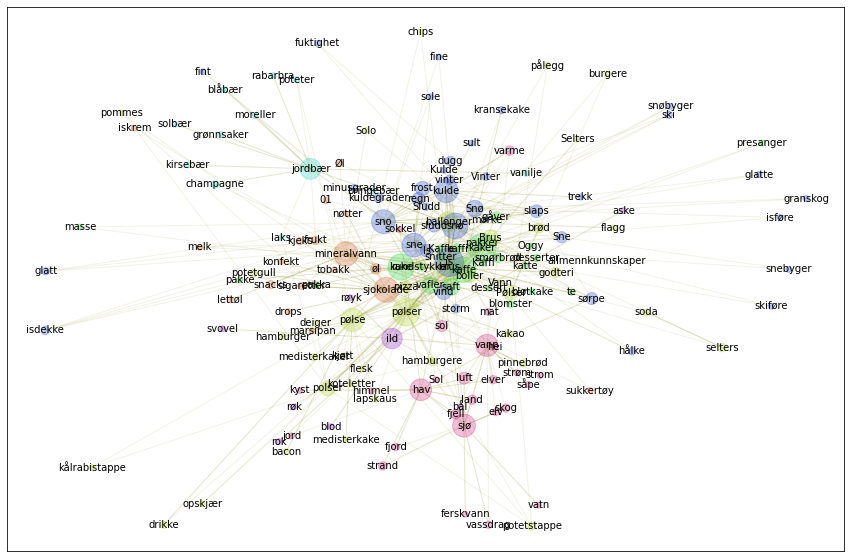

In [188]:
gnl.show_graph(ice, spread = 1)

In [189]:
gnl.show_communities(ice)

pølser-brus :  pølser, brus, pølse, ballonger, Brus, polser, Pølser, boller, pizza, brød, godteri, selters, potetstappe, hamburgere, soda, potetgull, kakao, drikke, medisterkaker, hamburger, pinnebrød, opskjær, Selters, medisterkake, Vann, chips, kjøtt, bacon, burgere, pommes, kålrabistappe, pålegg, deiger, koteletter, flagg, flesk, Solo, lapskaus

kaker-kake :  kaker, kake, kaffe, saft, vafler, pakker, kaffi, gåver, smørbrød, Kaffe, snitter, rundstykker, blomster, desserter, presanger, Oggy, bløtkake, masse, dessert, katte, pakka, te, Kaffi, pakke

jordbær-champagne :  jordbær, champagne, grønnsaker, solbær, rabarbra, vanilje, laks, blåbær, kirsebær, moreller, poteter, bringebær

is-snø :  is, snø, sno, sne, kulde, Snø, vind, frost, Is, slaps, sludd, regn, sørpe, Sne, dugg, vinter, kuldegrader, storm, isdekke, ski, glatt, Sludd, Vinter, hålke, minusgrader, kransekake, mørke, isføre, sole, fint, granskog, snøbyger, snebyger, glatte, skiføre, Kulde, fuktighet, trekk, sult, fine, allmenn

# Looking at a corpus

How to get data out of a corpus

Searching using live spec.

## concordance

It is a key word in context. First was created 1100, for the bible.

In [193]:
nb.concordance('demokratisk', yearfrom=1980, yearto=2070, before = 12, after = 12)         

",Norsk ordbok,2002","' - ] litt . , t Igjen- lb : gjeninnføre eit",demokratisk,styre ( DT 1979 ) . - innsetja v [ jen '
",By- og regionforskning for et samfunn i endring,2000","om kommunal ledelse , organisasjon og styring omfatter studier av kommunen som",demokratisk,"institusjon , som planleggingsaktør og som produsent av velferdstjenester . NIBRs kommunalforskning"
",Mens leken er god,1999",alltid lett å oppdage hvem lederne var . Deres lederstil var overveiende,demokratisk,", og konflikter ble for det meste løst gjennom drøfting. Et bredt"
",Aftenposten,1991",) erefter tommes salen langsomt . leie hoitideliglicden var af pn usedvanlig,demokratisk,"enkelbed , men den var præget af dybt alvor og vil for"
",Aftenposten,1991",ulykkelig og undertrykker det . denne verden til sin rordel . Den,demokratisk,", altså Ingen nasjonal- Og endelig « a man at det l"
",Aftenposten,1991",SSaLStSiA Mim.lerpr « adenun vU I nnsrm ^ t * åjtanm an,demokratisk,"reglering I Fo- J ^ « J gQSj * * 1 """
"Flyum, Ola,Sjonglørene,1997","motstandskamp , en Heimefrontledelse med representanter fra alle politiske partier og et",demokratisk,Norge .
"Flyum, Ola,Sjonglørene,1997",. Et lappeteppe bestående av mange politiske partier prøvde å berge et,demokratisk,ferniss i Weimar-republikken . To velorganiserte grupperinger - nazistene og kommunistene -


In [121]:
nb.concordance('demokrati', yearfrom=1980, yearto=2020, ddk = "839%")

"Oksholen, Tore,Undergang,2008",Har du noensinne opplevd et,demokrati,som fungere?» hadde CIA-offiseren spurt
"Oksholen, Tore,Undergang,2008",« Det fins ikke noe,demokrati,som fungerer . Som jeg
"Oksholen, Tore,Undergang,2008",som har,demokrati,", ytringsfrihet , velferdsgoder ..."
"Andersen, Per Thomas,Norsk litteraturhistorie,2001",fra embetsmannsregime til moderne politisk,demokrati,. Som mennesketype var han
"Andersen, Per Thomas,Norsk litteraturhistorie,2001",veien til et moderne partipolitisk,demokrati,ikke var noen selvsagt utvikling
"Senje, Siri,Biografien om Camilla Collett,2009",- tallet begynte tanker om,demokrati,", selvstendighet og « norskhet"
"Trovik, Tina,Samuel Sekel og flukten fra Paris,2012",for å oppnå rettferdighet og,demokrati,", slik som jeg vil"
"Kjærstad, Jan,Speil,1993",Det er jo umulig med,demokrati,i dag . Hva ?
"Kjærstad, Jan,Speil,1993",med folks samtykke og raserte,demokrati,og frihet . Selv kjærligheten


In [123]:
nb.concordance('demokrati', yearfrom=1980, yearto=2020, subject = "politikk")

",Medisin og samfunn,2003","mer i et direkte ,",demokrati,", er adskillelsen tvetydig ."
",Medisin og samfunn,2003",adskillelsen tvetydig . I et,demokrati,skal der være en stor
",Medisin og samfunn,2003",og styrte . Ideen om,demokrati,er ikke en idé om
",Medisin og samfunn,2003",. Også i et indirekte,demokrati,", en styreform som gir"
",Medisin og samfunn,2003",teorien er markedet det primære,demokrati,"- ja , det egentlige"
"Østby, Per,Flukten fra Detroit,1995","rekke om "" det funksjonelle",demokrati,""" . Sejersted konkluderer med"
"Østby, Per,Flukten fra Detroit,1995","var velstand , velferd og",demokrati,.
"Østby, Per,Flukten fra Detroit,1995",""" Modeller , makt og",demokrati,""" , i Atle Midttun"
"Østby, Per,Flukten fra Detroit,1995",til forholdet mellom politikk og,demokrati,.
"Østby, Per,Flukten fra Detroit,1995",spørsmål knyttet til spørsmålet om,demokrati,. Forskjellen var at her
"Walker, Martin,Kjempen våkner,1986",ekstreme sentraliseringen og mangelen på,demokrati,i økonomiske saker » .


# Build a specific corpus

In [82]:
hamsun = nb.book_urn(author = "hams%kn%", period = (1900, 1990))

Have a look at the data

In [83]:
hamsun

[[2012022308010, 'Hamsun, Knut', 'Samlede verker', 1976],
 [2012010508137, 'Hamsun, Knut', 'ede verker', 1955],
 [2011112108059, 'Hamsun, Knut', 'Pan', 1954],
 [2007081501065, 'Hamsun, Knut', 'Schwärmer ; Vagabundentage', 1989],
 [2011011005045, 'Hamsun, Knut', 'Samlede Verker', 1934],
 [2011011706058, 'Hamsun, Knut', 'Samlede Verker', 1934],
 [2014041108102, 'Hamsun, Knut', 'Samlede Verker', 1918],
 [2014120206051, 'Hamsun, Knut', 'Landstrykere', 1927],
 [2008090113002, 'Hamsun, Knut', 'Livets Under', 1910],
 [2011021506002, 'Hamsun, Knut', 'Samlede Verker', 1934],
 [2012051805119, 'Hamsun, Knut', 'Samlede romaner', 1944],
 [2008051504040, 'Hamsun, Knut', 'Samlede verker', 1954],
 [2012021308115, 'Hamsun, Knut', 'Livsfragmenter', 1988],
 [2014041108101, 'Hamsun, Knut', 'Samlede Verker', 1918],
 [2014031108009, 'Hamsun, Knut', 'Samlede Verker', 1918],
 [2013120238049, 'Hamsun, Knut', 'Victoria', 1964],
 [2012092408107, 'Hamsun, Knut', 'Samlede verker', 1963],
 [2014021807151, 'Hamsun, 

Check for duplicates by collecting all works with the same title in a bag (dictionary):

In [84]:
duplicates = dict()
for meta in hamsun:
    if meta[2] in duplicates:
        duplicates[meta[2]].append(meta)
    else:
        duplicates[meta[2]] = [meta]

In [85]:
duplicates

{'Samlede verker': [[2012022308010, 'Hamsun, Knut', 'Samlede verker', 1976],
  [2008051504040, 'Hamsun, Knut', 'Samlede verker', 1954],
  [2012092408107, 'Hamsun, Knut', 'Samlede verker', 1963]],
 'ede verker': [[2012010508137, 'Hamsun, Knut', 'ede verker', 1955]],
 'Pan': [[2011112108059, 'Hamsun, Knut', 'Pan', 1954]],
 'Schwärmer ; Vagabundentage': [[2007081501065,
   'Hamsun, Knut',
   'Schwärmer ; Vagabundentage',
   1989]],
 'Samlede Verker': [[2011011005045, 'Hamsun, Knut', 'Samlede Verker', 1934],
  [2011011706058, 'Hamsun, Knut', 'Samlede Verker', 1934],
  [2014041108102, 'Hamsun, Knut', 'Samlede Verker', 1918],
  [2011021506002, 'Hamsun, Knut', 'Samlede Verker', 1934],
  [2014041108101, 'Hamsun, Knut', 'Samlede Verker', 1918],
  [2014031108009, 'Hamsun, Knut', 'Samlede Verker', 1918]],
 'Landstrykere': [[2014120206051, 'Hamsun, Knut', 'Landstrykere', 1927]],
 'Livets Under': [[2008090113002, 'Hamsun, Knut', 'Livets Under', 1910]],
 'Samlede romaner': [[2012051805119, 'Hamsun, 

Sort duplicates by year, descending

In [86]:
for item in duplicates:
    duplicates[item].sort(key = lambda x: int(x[3]), reverse=True)

Display in a nice way:

In [87]:
for title in duplicates:
    printmd("### " + title )
    for item in duplicates[title]:
        printmd("* " + ' '.join([str(x) for x in item]))

### Samlede verker

* 2012022308010 Hamsun, Knut Samlede verker 1976

* 2012092408107 Hamsun, Knut Samlede verker 1963

* 2008051504040 Hamsun, Knut Samlede verker 1954

### ede verker

* 2012010508137 Hamsun, Knut ede verker 1955

### Pan

* 2011112108059 Hamsun, Knut Pan 1954

### Schwärmer ; Vagabundentage

* 2007081501065 Hamsun, Knut Schwärmer ; Vagabundentage 1989

### Samlede Verker

* 2011011005045 Hamsun, Knut Samlede Verker 1934

* 2011011706058 Hamsun, Knut Samlede Verker 1934

* 2011021506002 Hamsun, Knut Samlede Verker 1934

* 2014041108102 Hamsun, Knut Samlede Verker 1918

* 2014041108101 Hamsun, Knut Samlede Verker 1918

* 2014031108009 Hamsun, Knut Samlede Verker 1918

### Landstrykere

* 2014120206051 Hamsun, Knut Landstrykere 1927

### Livets Under

* 2008090113002 Hamsun, Knut Livets Under 1910

### Samlede romaner

* 2012051805119 Hamsun, Knut Samlede romaner 1944

### Livsfragmenter

* 2012021308115 Hamsun, Knut Livsfragmenter 1988

### Victoria

* 2013120238049 Hamsun, Knut Victoria 1964

### Dikte

* 2014021807151 Hamsun, Knut Dikte 1921

### På gjengrodde stier

* 2015052808077 Hamsun, Knut På gjengrodde stier 1979

### wilde Chor

* 2013040824021 Hamsun, Knut wilde Chor 1926

Sorted by variants lets us construct a new corpus with unique works

In [88]:
hamsun_unique = [duplicates[item][0] for item in duplicates]

This selects the newest editions. Another sorting can select the first editions.

In [89]:
hamsun_unique

[[2012022308010, 'Hamsun, Knut', 'Samlede verker', 1976],
 [2012010508137, 'Hamsun, Knut', 'ede verker', 1955],
 [2011112108059, 'Hamsun, Knut', 'Pan', 1954],
 [2007081501065, 'Hamsun, Knut', 'Schwärmer ; Vagabundentage', 1989],
 [2011011005045, 'Hamsun, Knut', 'Samlede Verker', 1934],
 [2014120206051, 'Hamsun, Knut', 'Landstrykere', 1927],
 [2008090113002, 'Hamsun, Knut', 'Livets Under', 1910],
 [2012051805119, 'Hamsun, Knut', 'Samlede romaner', 1944],
 [2012021308115, 'Hamsun, Knut', 'Livsfragmenter', 1988],
 [2013120238049, 'Hamsun, Knut', 'Victoria', 1964],
 [2014021807151, 'Hamsun, Knut', 'Dikte', 1921],
 [2015052808077, 'Hamsun, Knut', 'På gjengrodde stier', 1979],
 [2013040824021, 'Hamsun, Knut', 'wilde Chor', 1926]]

A concordance from a defined corpus

In [196]:
nb.urn_concordance(word = 'kvæld',urns = hamsun_unique, size = 20)

"ede verker, Hamsun, Knut, 1955",med sit fra morgen til,kvæld,", også fra kvæld til"
"ede verker, Hamsun, Knut, 1955","til kvæld , også fra",kvæld,til morgen . Jeg kunde
"ede verker, Hamsun, Knut, 1955",", den gode og stille",kvæld,kommer . Så begynder jeg
"ede verker, Hamsun, Knut, 1955","nu , det var igår",kvæld,", jeg kjendte bedst som"
"ede verker, Hamsun, Knut, 1955",Solem om en tjeneste en,kvæld,", da så jeg et"
"ede verker, Hamsun, Knut, 1955",? Det var sent på,kvæld,", fruen syntes å ha"
"ede verker, Hamsun, Knut, 1955",rullegardinet sit ned en god,kvæld,? Det er sammenhæng i
"ede verker, Hamsun, Knut, 1955",i naturen » . Søndag,kvæld,stod jeg og talte med
"ede verker, Hamsun, Knut, 1955",anden dame en vei i,kvæld,!
"ede verker, Hamsun, Knut, 1955",jeg vise Dem den i,kvæld,"? En forvirring opstod ,"
"ede verker, Hamsun, Knut, 1955",side . . . En,kvæld,kommer han over gården .


# Keywords within a corpus

Here we go about finding keywords in a corpus. First, build a corpus as a collection of URNs.

Define a corpus using metadata, like Deweys decimal system. [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html) is good for that.

In [214]:
korpus = nb.book_corpus(ddk="641%", limit = 200, period = (1980, 2000), lang='nob')

In [216]:
len(korpus)

200

In [217]:
korpus

,urn,author,title,year
0,2013062438149,,Fogtdals matleksikon,1984
1,2014070907181,,Mesterkokk på eget kjøkken,1994
2,2010081803023,"Telegin, Marie Louise",Lett og godt fra India,1999
3,2007100500014,"Hovig, Ingrid Espelid",Råd for uråd,1991
4,2015071608132,"Buen, Marianne Almstrøm",Glad mat,1989
...,...,...,...,...
195,2015091706091,"Seed, Diane",De 100 beste pasta-sausene,1992
196,2014033148045,"Taylor, Sally",Sunn mat er god mat,1987
197,2008090104051,"Kagge, Erling",Mat på tur,1999
198,2014021748082,"Petzke, Karl",Sjokolade,2000


Use the grand total for comparison



Normalize to make computations easier to follow.

In [203]:
tot = nb.frame(nb.totals(150000), "tot")
nb.normalize_corpus_dataframe(tot)
tot.head(10)

,tot
.,0.056313
",",0.049176
og,0.024178
i,0.020477
det,0.012164
som,0.011797
til,0.011323
er,0.011068
av,0.010463
en,0.010305


We aggregate the corpus and normalize. Actually, we normalize, and aggregate as means

In [218]:
corpus_text = nb.frame_sort(nb.frame(nb.aggregate_urns(nb.pure_urn(korpus)), 'freq'))

In [219]:
nb.normalize_corpus_dataframe(corpus_text)

True

In [220]:
corpus_text.head(20)

,freq
.,0.054226
",",0.040478
og,0.035498
i,0.026969
med,0.015393
til,0.012170
en,0.011905
er,0.011723
av,0.009891
1,0.009890


In [221]:
combo = pd.concat([tot, corpus_text], axis = 1, sort = False)

In [222]:
combo.head(30).style.background_gradient(axis = 0)

,tot,freq
.,0.056313,0.054226
",",0.049176,0.040478
og,0.024178,0.035498
i,0.020477,0.026969
det,0.012164,0.008231
som,0.011797,0.008212
til,0.011323,0.012170
er,0.011068,0.011723
av,0.010463,0.009891
en,0.010305,0.011905


# Compute association

In [223]:
combo['diff'] = combo.freq/combo.tot

In [224]:
combo.head(30).style.background_gradient(axis = 0)

,tot,freq,diff
.,0.056313,0.054226,0.962942
",",0.049176,0.040478,0.823133
og,0.024178,0.035498,1.468196
i,0.020477,0.026969,1.317077
det,0.012164,0.008231,0.676662
som,0.011797,0.008212,0.696117
til,0.011323,0.012170,1.074820
er,0.011068,0.011723,1.059227
av,0.010463,0.009891,0.945296
en,0.010305,0.011905,1.155183


In [225]:
nb.frame_sort(combo).head(30).style.background_gradient(axis = 0)

,tot,freq,diff
garneres,0.000000,0.000172,589.201092
Steketid,0.000000,0.000167,428.504762
anrettes,0.000001,0.000200,398.853803
Koketid,0.000000,0.000119,388.443994
parmesanost,0.000000,0.000103,303.361757
smakes,0.000000,0.000083,291.147211
Holdbarhet,0.000000,0.000071,288.694682
drysses,0.000000,0.000104,282.503573
kryddermål,0.000000,0.000078,263.300121
trøffel,0.000000,0.000091,254.185434


# Collocations

A collocation is like a concordance, but we don't see the actual sequence. We just collect the words in the context and tally up.

In [153]:
coll = nb.urn_coll('kaffe', urns = nb.pure_urn(korpus), before = 5, after = 5)

In [162]:
nb.normalize_corpus_dataframe(coll)

True

In [163]:
coll.sort_values(by=0, ascending=False).head(20)

,0
",",0.080328
og,0.066120
.,0.049180
med,0.024590
en,0.022404
på,0.016393
i,0.015301
til,0.013661
å,0.009836
"""",0.009290


Formally a collocation is just a bag of words, just like the corpus itself after aggregation. So the method is the same.

In [168]:
diff = nb.frame(coll[0]/tot.tot).sort_values(by=0, ascending = False)

In [169]:
diff.head(20)

,0
hardhaus,4511.394551
julekake,4458.984086
lace,4278.791731
vafler,3608.945206
tyvegods,3546.714312
snitter,3280.521278
Jørstadmoen,2985.844576
whiskey,2527.476420
dricka,2462.364006
spekepølse,2308.697681


In [160]:
coll2 = nb.urn_coll('offiser', urns = nb.pure_urn(korpus), before = 5, after = 5)

In [170]:
nb.normalize_corpus_dataframe(coll2)

True

In [171]:
coll2.sort_values(by=0, ascending=False).head(20)

,0
",",0.051522
en,0.041377
.,0.037681
som,0.030072
og,0.022246
i,0.020580
til,0.013841
var,0.013478
med,0.013188
av,0.011812


Formally a collocation is just a bag of words, just like the corpus itself after aggregation. So the method is the same.

In [172]:
diff2 = nb.frame(coll2[0]/tot.tot).sort_values(by=0, ascending = False)

In [173]:
diff2.head(20)

,0
vernepliktig,3007.968942
Officer,2290.767968
underoffiser,2183.438602
vakthavende,1874.804058
orderly,1715.662948
officer,1260.890516
generals,1208.261146
brit,1178.604622
generalstaben,1037.705240
commissioned,948.041924
